# Streaming Anomaly and Outlier Detection Methods - Stump

In [1]:
from pysad.transform.probability_calibration import ConformalProbabilityCalibrator
%matplotlib inline

import dill as pickle

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import animation
from IPython.display import HTML
import os

import stumpy
from matplotlib.patches import Rectangle


## Dataset
Run the preprocessing notebook to generate the dataset

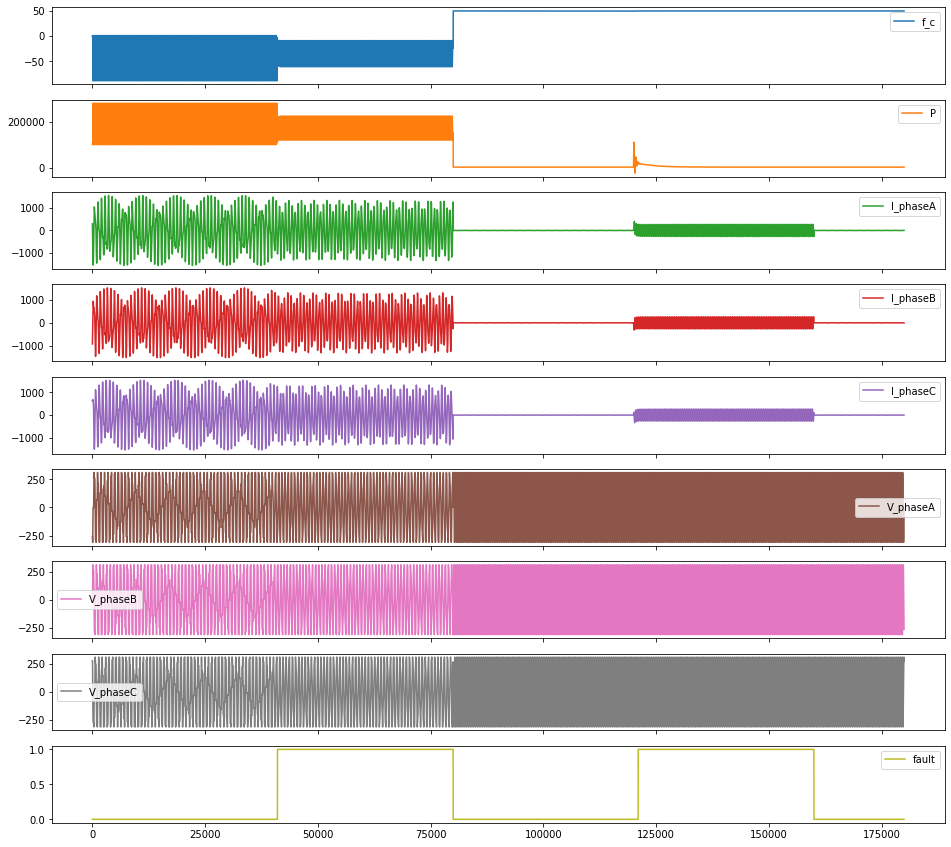

In [2]:
keys = ["f_c","P","I_phaseA","I_phaseB","I_phaseC","V_phaseA","V_phaseB","V_phaseC","fault"]
with open('../#datasets/Weak_Grid-7_5_mH.pkl', 'rb') as file:
    df= pickle.load(file)
df = df[:180000].copy()
df[keys].plot(subplots=True, figsize=(16,15));


## Stump

In [3]:
m = 500
key = 'P'
mp = stumpy.stump_gpu(df[key], m)

motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")

nearest_neighbor_idx = mp[motif_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

discord_idx = np.argsort(mp[:, 0])[-1]
print(f"The discord is located at index {discord_idx}")

nearest_neighbor_distance = mp[discord_idx, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The motif is located at index 52369
The nearest neighbor is located at index 77519
The discord is located at index 119509
The nearest neighbor subsequence to this discord is 29.911288214700036 units away


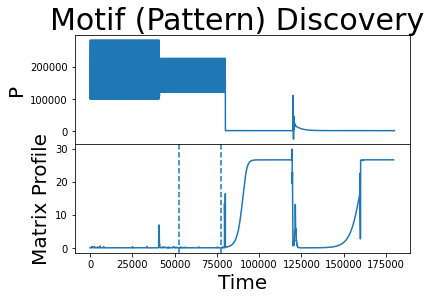

In [4]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(df[key].values)
axs[0].set_ylabel(key, fontsize='20')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

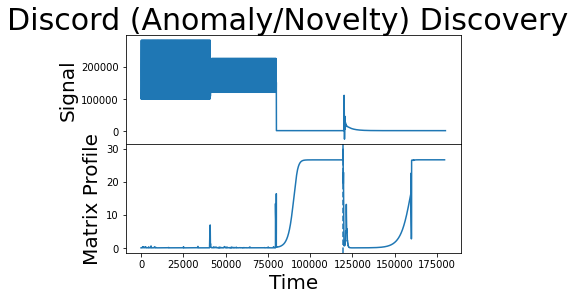

In [5]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(df[key].values)
axs[0].set_ylabel('Signal', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

In [6]:
# Multidimensional profile
# multi_df = df[:100000].copy()
model_keys = ["I_phaseA","I_phaseB","I_phaseC"]
m = 500

motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)

mps, indices = stumpy.mstump(df[model_keys], m)


[0.         0.5        0.66666667 ... 0.424      0.414      0.404     ]
[0.    0.002 0.004 ... 0.948 0.942 0.934]
[0.    0.    0.    ... 0.478 0.486 0.494]


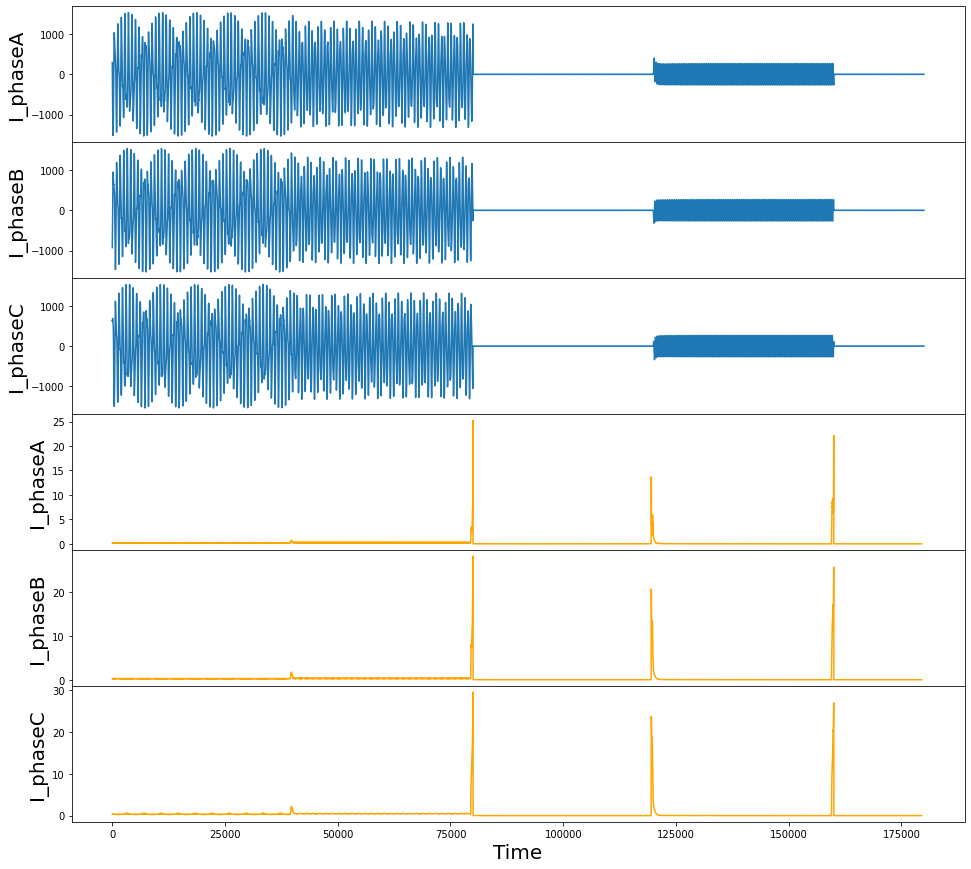

In [7]:
motifs_idx = np.argsort(mps, axis=1)[:, :2]
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0},figsize=(16,15))
# IMPORTANT CHANGE to multi_DF
prob = ConformalProbabilityCalibrator(windowed=True, window_size=m)
score_list = []
for k, dim_name in enumerate(df[model_keys].columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(df[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')
    # anomaly_score = mps[k]
    # if not isinstance(anomaly_score, list):
    #     anomaly_score = np.reshape(anomaly_score, (-1,1))
    # prob_score = prob.fit_transform(anomaly_score)
    # score_list.append(prob_score)
    # print(prob_score)

    axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + mps.shape[0]].plot(mps[k], c='orange')
    axs[k + mps.shape[0]].set_xlabel('Time', fontsize ='20')

    # axs[k].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    # axs[k].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')
    # axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    # axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')

    # if dim_name != 'I_phaseC':
    #     axs[k].plot(range(motifs_idx[k, 0], motifs_idx[k, 0] + m), df[dim_name].iloc[motifs_idx[k, 0] : motifs_idx[k, 0] + m], c='red', linewidth=4)
    #     axs[k].plot(range(motifs_idx[k, 1], motifs_idx[k, 1] + m), df[dim_name].iloc[motifs_idx[k, 1] : motifs_idx[k, 1] + m], c='red', linewidth=4)
    #     axs[k + mps.shape[0]].plot(motifs_idx[k, 0], mps[k, motifs_idx[k, 0]] + 1, marker="v", markersize=10, color='red')
    #     axs[k + mps.shape[0]].plot(motifs_idx[k, 1], mps[k, motifs_idx[k, 1]] + 1, marker="v", markersize=10, color='red')
    # else:
    #     axs[k + mps.shape[0]].plot(motifs_idx[k, 0], mps[k, motifs_idx[k, 0]] + 1, marker="v", markersize=10, color='black')
    #     axs[k + mps.shape[0]].plot(motifs_idx[k, 1], mps[k, motifs_idx[k, 1]] + 1, marker="v", markersize=10, color='black')

plt.show()
# plt.figure()
# plt.plot(score_list)

In [8]:
# Multidimensional profile
# multi_df = df[:100000].copy()
model_keys = ["V_phaseA","V_phaseB","V_phaseC"]
m = 500

motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)

mps, indices = stumpy.mstump(df[model_keys], m)


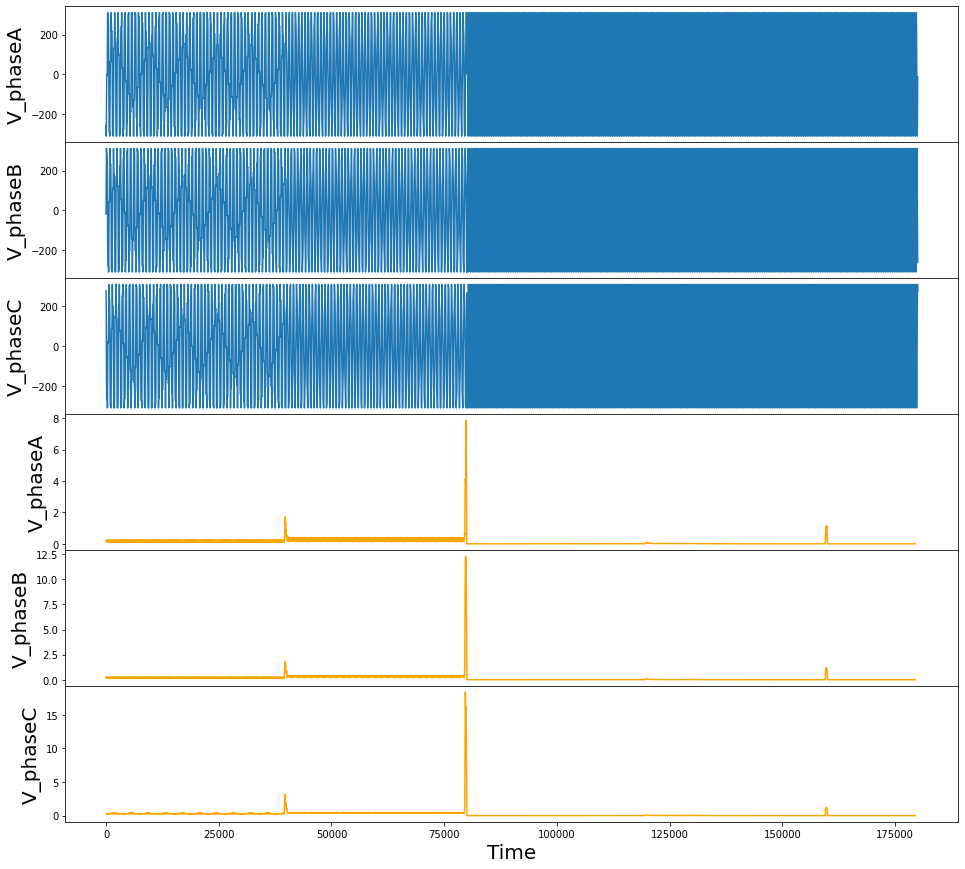

In [9]:
motifs_idx = np.argsort(mps, axis=1)[:, :2]
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0},figsize=(16,15))
# IMPORTANT CHANGE to multi_DF
prob = ConformalProbabilityCalibrator(windowed=True, window_size=m)
score_list = []
for k, dim_name in enumerate(df[model_keys].columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(df[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')
    # anomaly_score = mps[k]
    # if not isinstance(anomaly_score, list):
    #     anomaly_score = np.reshape(anomaly_score, (-1,1))
    # prob_score = prob.fit_transform(anomaly_score)
    # score_list.append(prob_score)
    # print(prob_score)

    axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + mps.shape[0]].plot(mps[k], c='orange')
    axs[k + mps.shape[0]].set_xlabel('Time', fontsize ='20')

    # axs[k].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    # axs[k].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')
    # axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    # axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')

    # if dim_name != 'I_phaseC':
    #     axs[k].plot(range(motifs_idx[k, 0], motifs_idx[k, 0] + m), df[dim_name].iloc[motifs_idx[k, 0] : motifs_idx[k, 0] + m], c='red', linewidth=4)
    #     axs[k].plot(range(motifs_idx[k, 1], motifs_idx[k, 1] + m), df[dim_name].iloc[motifs_idx[k, 1] : motifs_idx[k, 1] + m], c='red', linewidth=4)
    #     axs[k + mps.shape[0]].plot(motifs_idx[k, 0], mps[k, motifs_idx[k, 0]] + 1, marker="v", markersize=10, color='red')
    #     axs[k + mps.shape[0]].plot(motifs_idx[k, 1], mps[k, motifs_idx[k, 1]] + 1, marker="v", markersize=10, color='red')
    # else:
    #     axs[k + mps.shape[0]].plot(motifs_idx[k, 0], mps[k, motifs_idx[k, 0]] + 1, marker="v", markersize=10, color='black')
    #     axs[k + mps.shape[0]].plot(motifs_idx[k, 1], mps[k, motifs_idx[k, 1]] + 1, marker="v", markersize=10, color='black')